In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

"""Veri hazırlık kütüphaneleri"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

"""Modelleme Kütüphaneleri"""
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

"""Model Eleme"""
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_precision_recall_curve

"""Diğer"""
import os
import warnings
from sklearn.utils.testing import ignore_warnings
%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning)


C:\Users\Merve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Veri setinin Yüklenmesi
dt = pd.read_csv('//DESKTOP-45IP38J/Users/Merve/Desktop/term-deposit-marketing-2020.csv')


In [3]:
dt_copy = dt.copy()

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:

def print_uniques(dt):
    cols = ["age","job", "marital", "education", "default", "balance","housing", "loan", "contact", "day", "month","duration","campaign", "y"]

    for col in cols:
        print(col, dt[col].unique())

In [6]:
print_uniques(dt)

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
balance [  2143     29      2 ...   7222   3402 102127]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
duration [ 261  151   76 ... 1880 1460 2219]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


In [7]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


In [8]:
pd.DataFrame(dt.isnull().sum(),columns=["Count"])

,Count
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [9]:
#replac null values
dt.replace("unknown", np.nan, inplace=True)

In [10]:
dt.isna().sum()

age              0
job            235
marital          0
education     1531
default          0
balance          0
housing          0
loan             0
contact      12765
day              0
month            0
duration         0
campaign         0
y                0
dtype: int64

In [11]:
print_uniques(dt)

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]
job ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' nan 'primary']
default ['no' 'yes']
balance [  2143     29      2 ...   7222   3402 102127]
housing ['yes' 'no']
loan ['no' 'yes']
contact [nan 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
duration [ 261  151   76 ... 1880 1460 2219]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
y ['no' 'yes']


In [12]:
dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,no


In [13]:

dt = dt.astype({"job":'category', 
                "marital":'category', 
                "education":'category', 
                "contact":'category',
                "month":'category'})

In [14]:
dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,no


In [15]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int64   
 1   job        39765 non-null  category
 2   marital    40000 non-null  category
 3   education  38469 non-null  category
 4   default    40000 non-null  object  
 5   balance    40000 non-null  int64   
 6   housing    40000 non-null  object  
 7   loan       40000 non-null  object  
 8   contact    27235 non-null  category
 9   day        40000 non-null  int64   
 10  month      40000 non-null  category
 11  duration   40000 non-null  int64   
 12  campaign   40000 non-null  int64   
 13  y          40000 non-null  object  
dtypes: category(5), int64(5), object(4)
memory usage: 2.9+ MB


In [16]:
#dt = dt.drop("contact", axis=1)

In [17]:
def na_randomfill(series):
    na_mask = pd.isnull(series)   # boolean mask for null values
    n_null = na_mask.sum()        # number of nulls in the Series
    
    if n_null == 0:
        return series             # if there are no nulls, no need to resample
    
    # Randomly sample the non-null values from our series
    #  only sample this Series as many times as we have nulls 
    fill_values = series[~na_mask].sample(n=n_null, replace=True, random_state=0)

    # This ensures our new values will replace NaNs in the correct locations
    fill_values.index = series.index[na_mask]
    
    return series.fillna(fill_values)

In [18]:

dt["job"] = na_randomfill(dt["job"])
dt["education"] = na_randomfill(dt["education"])
dt["contact"] = na_randomfill(dt["contact"])

In [19]:
dt.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
dt_en = dt.apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

[0.11030923 0.06728765 0.02530823 0.02558678 0.00397684 0.11329981
 0.01294669 0.00968543 0.00859687 0.11092085 0.09247807 0.348792
 0.07081154]


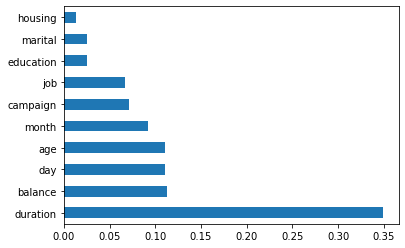

In [21]:

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
X = dt_en.drop("y", axis=1)
y = dt_en["y"]
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [22]:
dtf = pd.concat([dt_en[dt_en["y"] == 0][0:2896], dt_en[dt_en["y"] == 1]])

In [23]:
dtf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,39,4,1,2,0,3023,1,0,0,4,8,261,0,0
1,25,9,2,1,0,945,1,0,0,4,8,151,0,0
2,14,2,1,1,0,918,1,1,0,4,8,76,0,0
3,28,1,1,0,0,2420,1,0,0,4,8,92,0,0
4,14,0,2,2,0,917,0,0,0,4,8,198,0,0


In [24]:
X = dtf.drop("y", axis=1)
y = dtf["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [25]:
def draw_roc(model):
    roc_auc = roc_auc_score(y, model.predict(X))

    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Oranı')
    plt.ylabel('True Positive Oranı')
    plt.title('ROC')
    plt.show()

In [26]:
def print_scores(model, X_train, X_test, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    cross = cross_val_score(model, X_test, y_test, cv = 5).mean()
    
    draw_roc(loj_model)
    plot_confusion_matrix(model, X_test, y_test)
    
    disp = plot_precision_recall_curve(loj_model, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    print('Accuracy: {0:0.3f} \nPrecision: {1:0.3f}\nRecall: {2:0.3f} \nF1-Score: {3:0.3f}\n10-Fold Cross Validation: {4:0.3f}'
          .format(acc, precision, recall, f1, cross))

# Logistic Regression

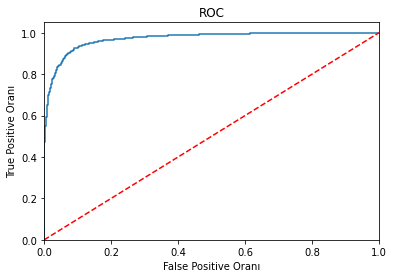

Accuracy: 0.921 
Precision: 0.932
Recall: 0.904 
F1-Score: 0.921
10-Fold Cross Validation: 0.913


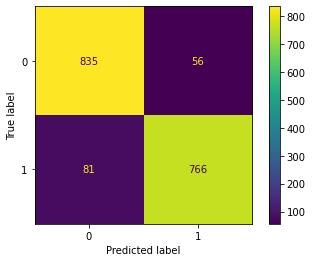

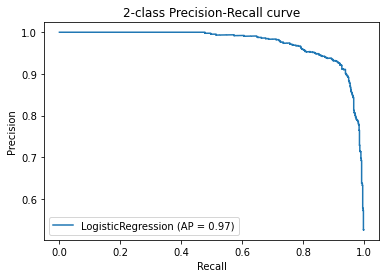

In [27]:

from sklearn.metrics import precision_score
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
y_pred = loj_model.predict(X_test)
print_scores(loj_model, X_train, X_test, y_test, y_pred)

In [28]:
%matplotlib inline
from numpy.random import randint

# Neural Network

In [29]:

scaler = StandardScaler()


In [30]:

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
%%time
mlpc_model = MLPClassifier()
mlpc_model.fit(X_train_scaled, y_train)
y_pred = mlpc_model.predict(X_test_scaled)

Wall time: 30.6 s


C:\Users\Merve\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


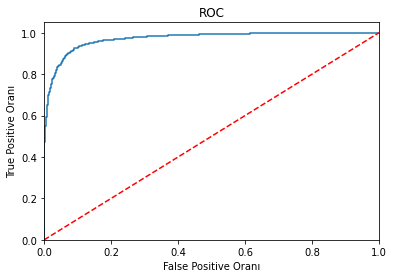

Accuracy: 0.933 
Precision: 0.939
Recall: 0.923 
F1-Score: 0.933
10-Fold Cross Validation: 0.869


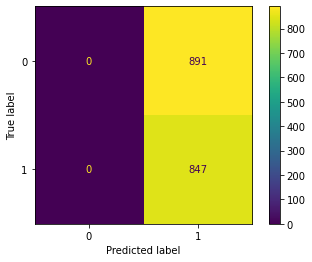

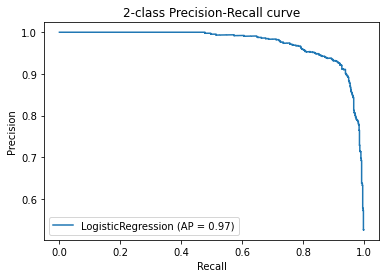

In [32]:
print_scores(mlpc_model, X_train, X_test, y_test, y_pred)

# KNN

In [33]:


%%time
knn = KNeighborsClassifier()

knn_params = {"n_neighbors": np.arange(1,15)}

knn_cv = GridSearchCV(knn, knn_params, 
                            cv = 5, 
                            n_jobs = 5, 
                            verbose = 2 )

knn_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   15.7s


Wall time: 19 s


[Parallel(n_jobs=5)]: Done  70 out of  70 | elapsed:   18.8s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             verbose=2)

In [34]:
print("Best Skor:" + str(knn_cv.best_score_))
print("Best Parameter: " + str(knn_cv.best_params_))

Best Skor:0.7945240596124278
Best Parameter: {'n_neighbors': 9}


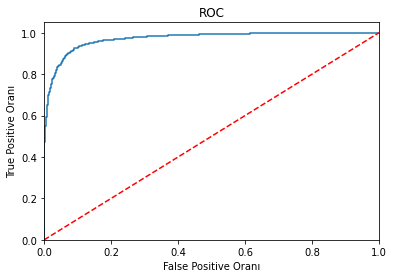

Accuracy: 0.803 
Precision: 0.803
Recall: 0.790 
F1-Score: 0.803
10-Fold Cross Validation: 0.776


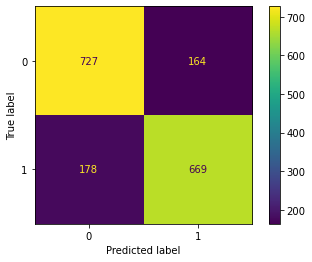

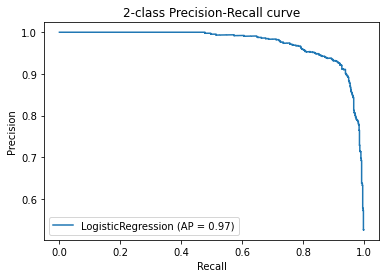

In [35]:
knn = KNeighborsClassifier(9)
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print_scores(knn_model, X_train, X_test, y_test, y_pred)

# Gaussian Naive Bayes

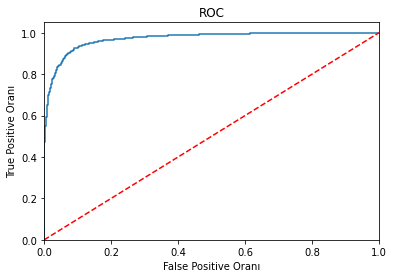

Accuracy: 0.921 
Precision: 0.966
Recall: 0.868 
F1-Score: 0.921
10-Fold Cross Validation: 0.920


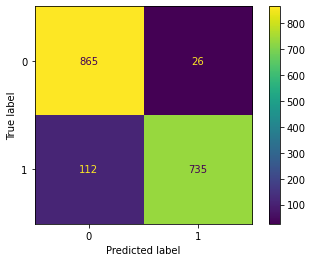

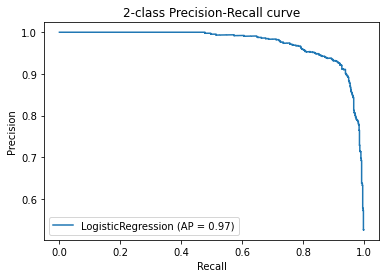

In [36]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print_scores(nb_model, X_train, X_test, y_test, y_pred)

In [37]:
models = [
    knn_model,
    loj_model,
    nb_model,
    mlpc_model,
  
]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.5%}".format(acc))

----------------------------
KNeighborsClassifier:
Accuracy: 80.32221%
----------------------------
LogisticRegression:
Accuracy: 92.11738%
----------------------------
GaussianNB:
Accuracy: 92.05984%
----------------------------
MLPClassifier:
Accuracy: 48.73418%


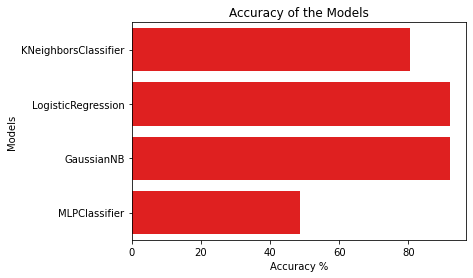

In [38]:

result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, acc*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the Models');

In [39]:

results.sort_values(by="Accuracy", ascending=False, ignore_index=True)

,Models,Accuracy
0,LogisticRegression,92.117376
1,GaussianNB,92.059839
2,KNeighborsClassifier,80.322209
3,MLPClassifier,48.734177


In [ ]:
#bu hesaplamada asıl esas alınması gerekenler balance,housing,loan kolonlarında tutulan bilgilerdir.
#Kritik noktaları oluşturan,müşterinin satın alma tahmini üzerinde bu noktaların esas alınması gerektiğini düşünüyorum.